<a href="https://colab.research.google.com/github/mayurdesai32/machine-learning-project/blob/main/gold_price_prediction/gold_price_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all Dependencies

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 

# Data collected form https://www.kaggle.com/code/itsbitan/gold-price-prediction/data


In [84]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [85]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [86]:
gold_data.shape

(2290, 6)

In [87]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [88]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


for correlation

In [89]:
correlation=gold_data.corr()

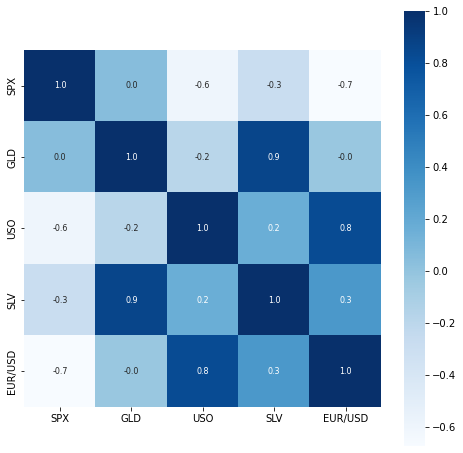

In [90]:
plt.figure(figsize=(8,8))  
sns.heatmap(correlation ,cbar=True ,square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [91]:
# correlation value of Gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


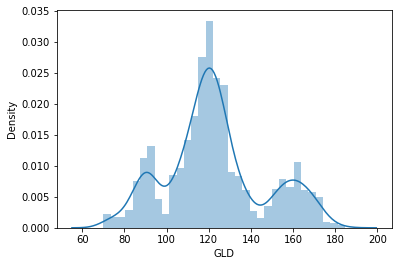

In [92]:
# checking the distribution of the gld price
sns.distplot(gold_data['GLD'])

for model

In [93]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [94]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [95]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [96]:
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.1,random_state=1)

In [97]:
model=RandomForestRegressor(n_estimators=100)


In [98]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [99]:
y_pred=model.predict(x_test)

In [100]:
y_pred

array([113.48739994, 148.5874006 , 144.00379925, 112.59680176,
       114.06169987,  95.49589948, 111.7661    ,  93.50290027,
       120.56270088, 127.35510003, 147.84969875, 120.39959927,
       118.97210055,  88.19830027,  96.1951002 ,  92.79809861,
       116.4969007 ,  89.05069917, 125.77520139, 114.87840018,
       119.74549939, 152.90830214, 122.70549796, 119.89459971,
       171.26809961, 108.45339841, 120.67610123,  87.38539918,
        87.62260003,  88.20109925, 121.58300017, 154.21500103,
       149.37049924, 126.38979962, 126.31250042,  90.74849922,
       156.86150025, 121.47400161, 106.76740091, 144.31919673,
        92.65379938, 127.51300121, 117.35160131, 152.5310011 ,
       119.45540015,  91.27280171,  78.72710003, 120.3200019 ,
       131.98210019, 119.05449945, 127.2964006 , 165.81860045,
       153.71420075,  92.59869959, 149.14129946, 151.79269872,
       113.87630153, 113.10770052,  86.94579916, 127.6561999 ,
       125.5126017 , 151.99000222, 114.28529965, 110.57

In [101]:
error_score=r2_score(y_test,y_pred)
print('R Score is: ',error_score)

R Score is:  0.992215019748923
